### Atlas mapping
This code will take various raw data and map them to a specified atlas. This can be done either by 
1. labelling xyz coordinates with atlas keys 
2. by extracting region averages using the atlas VOIs as masks on a full resolution image file. 

In [1]:
import ants
import zst_atlasmap_functions as am
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.io 
from imp import reload
import numpy as np

### Housekeeping

In [2]:
# Housekeeping
#=========================================================================
reload(am)
atlas = '/Users/roschkoenig/Dropbox/Research/0002 Tools/Standalone/zbb2/anatomy/pajevic1.tif'
base  = '/Volumes/GoogleDrive/My Drive/Research/2003 Zebrafish Structure'
F     = am.housekeeping(base, 'Ashourvan')


In [9]:
# Load atlas data
#=========================================================================
F['atlas']
atlas = scipy.io.loadmat(F['atlas']+os.sep+'kmeans_MATLAB_iter_500_DS_K_500_Interp3.mat')['Vq']

In [10]:
# Map xyz location to atlas
#=========================================================================
struct     = F['data'] +os.sep+ 'Kunst_Connections.csv'
data       = pd.read_csv(struct)
conversion = (1,1,2.5)
emp_mat    = np.zeros((atlas.max(), atlas.max()))
connect    = np.zeros((atlas.max(), atlas.max()))
connect_sc = np.zeros((atlas.max(), atlas.max()))

oldstart = 0
starts   = []
stops    = []
labl     = []

# Extract atlas labels for each neurite 
#-------------------------------------------------------------------------
for row in data.index: 
    if np.mod(row,10000) == 1: print(row); print(connect_sc.max()); print(st_sc)
    start = (data['start_x'][row], data['start_y'][row], data['start_z'][row])
    stop  = (data['stop_x'][row], data['stop_y'][row], data['stop_z'][row])
    st_sc = np.divide(stop,conversion).round().astype('int') 
    if stop[2] < 137 * conversion[2]:    # exclude end points outside the atlas range 
        if start == oldstart:
            labl.append(atlas[st_sc[0], st_sc[1], st_sc[2]]-1)
        else:
            oldstart = start
            temp_mat = np.zeros((atlas.max(), atlas.max()))
            if labl:
                for l in labl:
                    for ll in labl:
                        temp_mat[l,ll] = temp_mat[l,ll] + 1
                connect_sc = connect_sc + temp_mat / temp_mat.sum()
                labl  = []
                     
        starts.append(start)
        stops.append(stop)

# Load xyz coordinates
#-------------------------------------------------------------------------


1
0.0
[405 353  79]
10001
12.267203945572641
[334 437  46]
20001
16.467525366003663
[160 599 109]
30001
18.593927146676865
[256 524  77]
40001
21.361483863076764
[132 461  57]
50001
27.88669777247806
[367 207  65]
60001
29.246289280275754
[394 641  26]
70001
32.584856943473106
[187 456  50]
80001
35.960926656529416
[260 513  52]


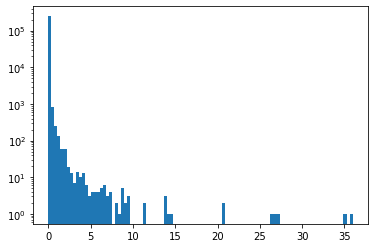

In [12]:
f,a = plt.subplots(1)
a.hist(connect_sc.flatten(), bins = 100, log = True)
a.yscale = 'log'
plt.show()

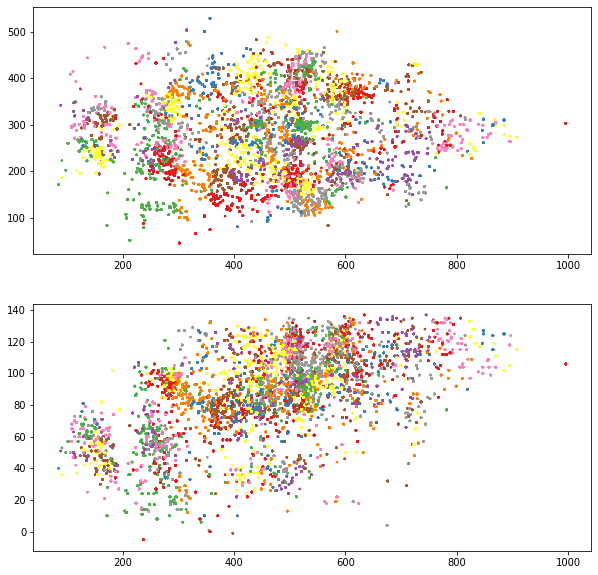

In [13]:
conversion = (1,1,2.5) 
f,a = plt.subplots(2, figsize=(10,10))

coord = np.ndarray(0)
col = np.ndarray(0)

for s in range(len(starts)):
    c_sc  = np.divide(starts[s],conversion).round().astype('int') 
    if c_sc[2] < 138:
        tcol  = atlas[c_sc[0], c_sc[1], c_sc[2]]
        coord = c_sc if len(coord) == 0 else np.vstack((coord, c_sc))
        col   = np.asarray(tcol) if np.size(col) == 0 else np.vstack((col, tcol))

a[0].scatter(coord[:,1], coord[:,0], s=2, c=col[:,0], cmap='Set1')
a[1].scatter(coord[:,1], coord[:,2], s=2, c=col[:,0], cmap='Set1')

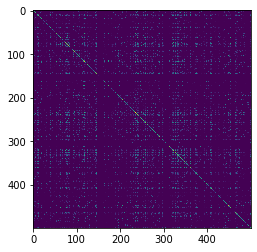

In [20]:
plt.imshow(np.log(connect_sc+0.01))

In [22]:
dic = {'sc_500' : connect_sc}
scipy.io.savemat(F['outp']+os.sep+'structural_connectivity.mat', dic)